# FnGuide 마켓 데이터 전처리

- 시가총액, 거래대금 기준 top 100에 드는 종목만 universe로 남길 예정

In [1]:
from pathlib import Path
import pandas as pd

In [2]:
CWD = Path.cwd()
WORKSPACE_PATH = CWD.parent
COMMON_PATH = WORKSPACE_PATH / 'common'
DATA_PATH = WORKSPACE_PATH / 'data'

## 데이터 불러오기 & 전처리

In [5]:
filename = 'DataGuide_KSE+KOSDAQ_20200101-20240712_ALL.xlsx'

df = pd.read_excel(DATA_PATH / filename, skiprows=8,)

,Symbol,Symbol Name,Kind,Item,Item Name,Frequency,2020-01-02 00:00:00,2020-01-03 00:00:00,2020-01-06 00:00:00,2020-01-07 00:00:00,...,2024-07-01 00:00:00,2024-07-02 00:00:00,2024-07-03 00:00:00,2024-07-04 00:00:00,2024-07-05 00:00:00,2024-07-08 00:00:00,2024-07-09 00:00:00,2024-07-10 00:00:00,2024-07-11 00:00:00,2024-07-12 00:00:00
0,A005930,삼성전자,SSC,S41000170F,수익률(%),DAILY,-1.080000e+00,5.400000e-01,0.000000e+00,5.400000e-01,...,3.700000e-01,0.000000e+00,0.000000e+00,3.420000e+00,2.960000e+00,3.400000e-01,4.600000e-01,0.000000e+00,-2.300000e-01,-3.650000e+00
1,A005930,삼성전자,SSC,S410000900,거래대금(원),DAILY,7.196632e+11,8.602067e+11,5.674615e+11,5.602267e+11,...,9.254009e+11,1.186008e+12,9.338020e+11,3.679078e+12,3.951280e+12,2.105162e+12,1.869415e+12,1.560912e+12,2.164539e+12,2.234915e+12
2,A005930,삼성전자,SSC,S410007300,거래대금 (52주 평균)(원),DAILY,5.086133e+11,5.101875e+11,5.103585e+11,5.106406e+11,...,1.243658e+12,1.243423e+12,1.244041e+12,1.256006e+12,1.268503e+12,1.272998e+12,1.275432e+12,1.278470e+12,1.283779e+12,1.289870e+12
3,A005930,삼성전자,SSC,S410001200,시가총액 (티커-상장예정주식수 포함)(백만원),DAILY,3.295320e+08,3.313229e+08,3.313229e+08,3.331139e+08,...,4.883282e+08,4.883282e+08,4.883282e+08,5.050436e+08,5.199681e+08,5.217590e+08,5.241469e+08,5.241469e+08,5.229530e+08,5.038496e+08
4,A005930,삼성전자,SSC,S420002900,시가총액 (52주 평균)(백만원),DAILY,3.098046e+08,3.102886e+08,3.107777e+08,3.112389e+08,...,4.890973e+08,4.893092e+08,4.895387e+08,4.898418e+08,4.902377e+08,4.907586e+08,4.911260e+08,4.916119e+08,4.920394e+08,4.923692e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29755,A950180,SNK,SSC,S410001200,시가총액 (티커-상장예정주식수 포함)(백만원),DAILY,3.506790e+05,3.675280e+05,3.569980e+05,3.580510e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29756,A950180,SNK,SSC,S420002900,시가총액 (52주 평균)(백만원),DAILY,4.361080e+05,4.356920e+05,4.352180e+05,4.347560e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29757,A950180,SNK,BTA,S41B0D1005,"베타 (D,1Yr)",DAILY,1.102240e+00,1.092120e+00,1.093330e+00,1.090240e+00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29758,A950180,SNK,SSC,S420006502,배당수익률(IFRS-연결),DAILY,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
ticker_to_name = df[['Symbol', 'Symbol Name']].drop_duplicates().set_index('Symbol').to_dict()['Symbol Name']

In [18]:
name_to_tick = {v: k for k, v in ticker_to_name.items()}  

In [34]:
item_aliases = ['returns', 'moneyvolume', 'moneyvolume52w', 'marketcap', 'marketcap52w', 'beta1y', 'divyield(con)', 'pbr(con)']

itemkor_to_eng = dict(zip(df['Item Name '].drop_duplicates().to_list(), item_aliases))
itemeng_to_kor = {v: k for k, v in itemkor_to_eng.items()}

In [ ]:
df.drop(columns=['Symbol Name', 'Kind', 'Item', 'Frequency', ], inplace=True)

In [29]:
df.columns

Index([           'Symbol',        'Item Name ', 2020-01-02 00:00:00,
       2020-01-03 00:00:00, 2020-01-06 00:00:00, 2020-01-07 00:00:00,
       2020-01-08 00:00:00, 2020-01-09 00:00:00, 2020-01-10 00:00:00,
       2020-01-13 00:00:00,
       ...
       2024-07-01 00:00:00, 2024-07-02 00:00:00, 2024-07-03 00:00:00,
       2024-07-04 00:00:00, 2024-07-05 00:00:00, 2024-07-08 00:00:00,
       2024-07-09 00:00:00, 2024-07-10 00:00:00, 2024-07-11 00:00:00,
       2024-07-12 00:00:00],
      dtype='object', length=1120)

In [35]:
df = df.melt(id_vars=['Symbol', 'Item Name '], var_name='Date', value_name='Value', )

In [36]:
df

,Symbol,Item Name,Date,Value
0,A005930,수익률(%),2020-01-02 00:00:00,-1.080000e+00
1,A005930,거래대금(원),2020-01-02 00:00:00,7.196632e+11
2,A005930,거래대금 (52주 평균)(원),2020-01-02 00:00:00,5.086133e+11
3,A005930,시가총액 (티커-상장예정주식수 포함)(백만원),2020-01-02 00:00:00,3.295320e+08
4,A005930,시가총액 (52주 평균)(백만원),2020-01-02 00:00:00,3.098046e+08
...,...,...,...,...
33271675,A950180,시가총액 (티커-상장예정주식수 포함)(백만원),2024-07-12 00:00:00,NaN
33271676,A950180,시가총액 (52주 평균)(백만원),2024-07-12 00:00:00,NaN
33271677,A950180,"베타 (D,1Yr)",2024-07-12 00:00:00,NaN
33271678,A950180,배당수익률(IFRS-연결),2024-07-12 00:00:00,NaN


In [37]:
df.columns = ['Symbol', 'ItemEng', 'Date', 'Value']
df['ItemEng'] = df['ItemEng'].map(itemkor_to_eng)

In [40]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [42]:
df.to_pickle(DATA_PATH / 'stock_data_ALL.pkl') # 전처리 끝난 level 1 data

In [44]:
returns_df = df[df['ItemEng'] == 'returns'].pivot_table(index='Date', columns='Symbol', values='Value', aggfunc='first')


In [51]:
returns_df = returns_df / 100

In [45]:
moneyvolume_df = df[df['ItemEng'] == 'moneyvolume'].pivot_table(index='Date', columns='Symbol', values='Value', aggfunc='first')


In [46]:
marketcap_df = df[df['ItemEng'] == 'marketcap'].pivot_table(index='Date', columns='Symbol', values='Value', aggfunc='first')

In [52]:
returns_df.to_pickle(DATA_PATH / 'returns_df_ALL.pkl') # 전처리 끝난 전체 유니버스 데이터들
moneyvolume_df.to_pickle(DATA_PATH / 'moneyvolume_df_ALL.pkl')
marketcap_df.to_pickle(DATA_PATH / 'marketcap_df_ALL.pkl')

<Axes: xlabel='Date'>

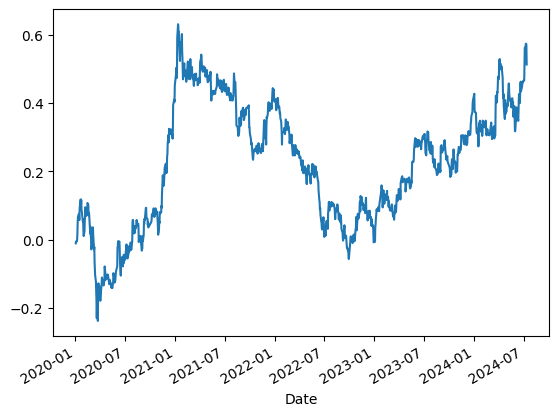

In [55]:
((returns_df['A005930'] + 1).cumprod() - 1).plot() # 삼성전자 주가 확인

## Top 100 필터링

In [59]:
moneyvolume_df_top100_mask = moneyvolume_df.rank(axis=1, method='first', ascending=False) <= 100

In [60]:
marketcap_df_top100_mask = marketcap_df.rank(axis=1, method='first', ascending=False) <= 100

In [78]:
universe_df_top100_mask = (moneyvolume_df_top100_mask * marketcap_df_top100_mask)

In [85]:
universe_df_top100_list = (moneyvolume_df_top100_mask * marketcap_df_top100_mask).any(axis=0)
universe_df_top100_list

Symbol
A000020    False
A000040    False
A000050    False
A000060     True
A000070    False
           ...  
A950180    False
A950190    False
A950200    False
A950210    False
A950220    False
Length: 2727, dtype: bool

In [87]:
returns_df_top100 = returns_df.loc[:, universe_df_top100_list].copy()

In [88]:
returns_df_top100.to_pickle(DATA_PATH / 'returns_df_top100.pkl')

In [89]:
returns_df_top100

Symbol,A000060,A000080,A000100,A000120,A000150,A000210,A000250,A000270,A000660,A000720,...,A373220,A377300,A383220,A402340,A403870,A417200,A443060,A450080,A454910,A462870
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,-0.0392,-0.0034,-0.0211,-0.0161,-0.0199,-0.0298,0.0211,-0.0406,0.0064,-0.0260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.0000,-0.0121,-0.0043,-0.0295,-0.0087,0.0000,-0.0316,-0.0118,-0.0021,-0.0049,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-06,-0.0292,0.0035,-0.0174,-0.0068,-0.0249,-0.0421,-0.0327,-0.0024,-0.0021,-0.0366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,-0.0150,-0.0070,0.0177,0.0000,-0.0045,0.0131,-0.0059,0.0036,-0.0032,0.0051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,-0.0152,-0.0264,-0.0195,-0.0238,-0.0226,-0.0305,-0.0428,-0.0178,0.0362,-0.0516,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-08,NaN,0.0123,-0.0235,-0.0086,-0.0090,-0.0089,-0.0112,-0.0166,-0.0106,-0.0016,...,0.0028,0.0111,-0.0117,-0.0115,0.0401,0.0064,0.0144,0.0306,0.0381,NaN
2024-07-09,NaN,-0.0024,0.0126,0.0065,0.0475,0.0000,0.0746,-0.0137,0.0214,0.0078,...,0.0126,0.0349,-0.0017,0.0019,-0.0012,0.0000,-0.0176,0.0139,0.0000,NaN
2024-07-10,NaN,-0.0097,0.0102,-0.0139,0.0086,0.0358,0.0239,-0.0041,0.0021,-0.0093,...,-0.0028,0.0160,0.0017,-0.0019,-0.0100,0.0234,-0.0051,-0.0264,0.0114,NaN
